In [14]:
EXPORT_PATH = "../data/processed/"
ASSETS_PATH = "../assets/plots/eda/"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# === Plot Style ===
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
def plot_histogram(
    data, column, bins=30, kde=True, figsize=(10, 4), 
    title=None, xlabel=None, ylabel="Number of Patients", 
    save_path=None
):
    plt.figure(figsize=figsize)
    sns.histplot(data[column], bins=bins, kde=kde)
    plt.title(title if title else f"{column} Distribution")
    plt.xlabel(xlabel if xlabel else column)
    plt.ylabel(ylabel)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()

In [15]:
# === Load dataset ===
df_final = pd.read_csv(os.path.join(EXPORT_PATH, "df_final_static.csv"))

# === Confirm structure ===
print(df_final.shape)
df_final.head()
df_final.columns
df_final.isnull().sum().sort_values(ascending=False)/len(df_final)

(3685, 16)


SUBJECT_ID              0.0
HADM_ID                 0.0
ICUSTAY_ID              0.0
AGE                     0.0
GENDER                  0.0
ADMISSION_TYPE          0.0
ADMISSION_LOCATION      0.0
INSURANCE               0.0
FIRST_CAREUNIT          0.0
LOS                     0.0
HOSPITAL_EXPIRE_FLAG    0.0
INTIME_HOUR             0.0
INTIME_WEEKDAY          0.0
ADMITTIME_HOUR          0.0
ADMITTIME_WEEKDAY       0.0
INTIME                  0.0
dtype: float64

In [17]:
print("\n[INFO] Summary statistics for numeric variables:")
display(df_final.describe().T)


[INFO] Summary statistics for numeric variables:


,count,mean,std,min,25%,50%,75%,max
SUBJECT_ID,3685.0,38042.643691,29519.241245,3.0000,13934.0000,27748.0000,62871.000,99985.0000
HADM_ID,3685.0,149043.439077,29176.674824,100074.0000,123675.0000,148651.0000,175213.000,199943.0000
ICUSTAY_ID,3685.0,250221.804885,28861.797019,200003.0000,225602.0000,250364.0000,275615.000,299950.0000
AGE,3685.0,68.258887,15.991439,0.0000,58.0000,70.0000,81.000,91.0000
LOS,3685.0,5.744356,7.677370,0.0079,1.7219,3.0194,6.602,97.2972
HOSPITAL_EXPIRE_FLAG,3685.0,0.287110,0.452475,0.0000,0.0000,0.0000,1.000,1.0000
INTIME_HOUR,3685.0,13.721574,7.062893,0.0000,8.0000,16.0000,20.000,23.0000
INTIME_WEEKDAY,3685.0,3.023338,1.988703,0.0000,1.0000,3.0000,5.000,6.0000
ADMITTIME_HOUR,3685.0,13.995387,7.084968,0.0000,9.0000,16.0000,20.000,23.0000
ADMITTIME_WEEKDAY,3685.0,3.016554,2.011907,0.0000,1.0000,3.0000,5.000,6.0000


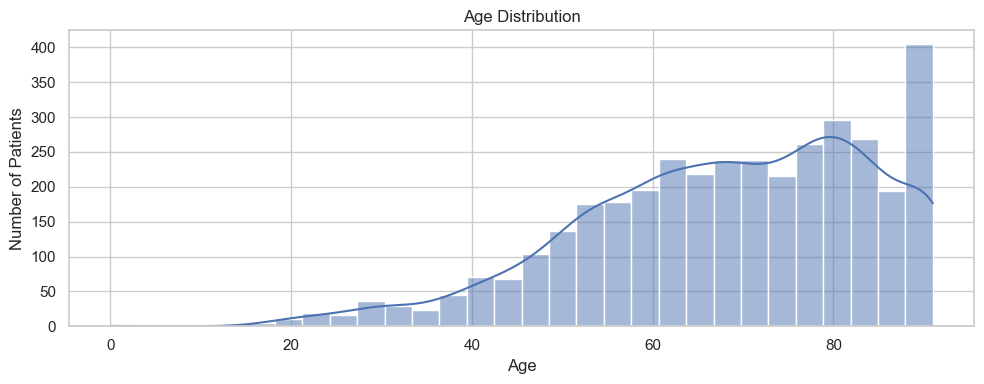

In [18]:
plot_histogram(
    data=df_final, 
    column="AGE", 
    bins=30, 
    title="Age Distribution", 
    xlabel="Age", 
    save_path=ASSETS_PATH + "age_distribution.png"
)

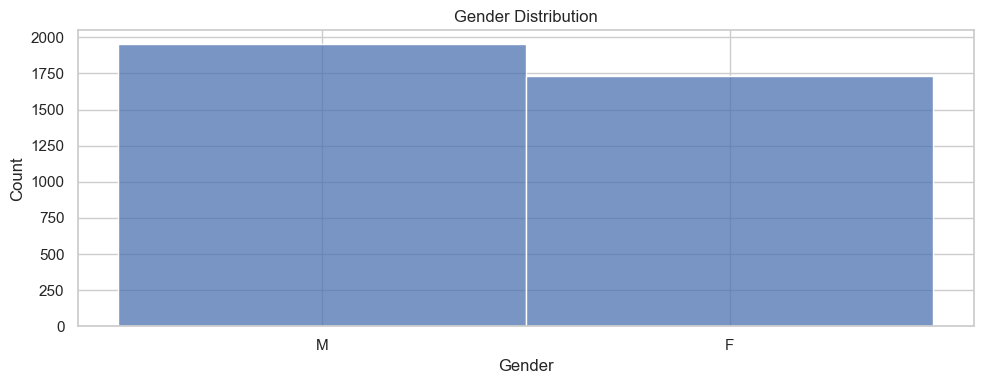

In [19]:
plot_histogram(
    data=df_final, 
    column="GENDER", 
    bins=len(df_final["GENDER"].unique()), 
    kde=False, 
    title="Gender Distribution", 
    xlabel="Gender", 
    ylabel="Count", 
    save_path=ASSETS_PATH + "gender_distribution.png"
)

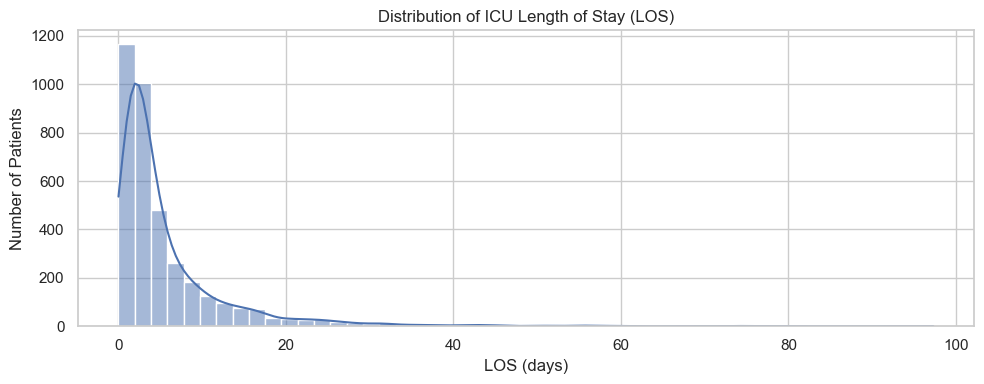

Outliers: 7
90° percentile: 13.71 days
99° percentile: 37.41 days
Max LOS: 97.30 days


In [ ]:
plot_histogram(
    data=df_final,
    column="LOS",
    bins=50,
    title="Distribution of ICU Length of Stay (LOS)",
    xlabel="LOS (days)",
    save_path=ASSETS_PATH + "los_distribution.png"
)

q90 = df_final['LOS'].quantile(0.90)
q99 = df_final['LOS'].quantile(0.99)
max_los = df_final['LOS'].max()

print(f'Outliers: {df_final[(df_final.LOS>60)].shape[0]}')
print(f"90° percentile: {q90:.2f} days")
print(f"99° percentile: {q99:.2f} days")
print(f"Max LOS: {max_los:.2f} days")

In [21]:
# Remove outliers
df_final = df_final[df_final['LOS'] <= 60]